# Linear Regression

## 머신러닝 학습 방법

### Supervised learning ( 지도학습 )
훈련 데이터로부터 하나의 함수를 유추

- Gradient descent based learning
- Probability theory based learning
- Information theroy based learning
- Distance similarity based learning

#### Gradient descent based learning
- 실제 값과 학습된 모델 예측치의 오차 최소화
- 모델의 최적 parameter 찾기가 목적


## normal equation

예측치 : $ \hat{y} = ax + b $  
실제 관측치 : $ y = ax + b + e $  

#### cost function : 실제값과 가설함수 차이


- cost function
![cost function](../img/cost_function.png)

![미분](../img/one_varaible.png)

#### weights의 최적값 컴퓨터가 찾는 방법
- 연립방정식 풀기
- gradient descent

#### normal equation

![normal_eq_1](../img/normal_eq_1.png)

![normal equation](../img/normal_equation.png)

![normal equation](../img/normal_equation_2.png)

$ w_0 는 상수항의 weight, w_1 은 x 계수의 weight $ 

- Iteration 등의 사용자 지정 Parameter가 없음  
- Feature 가 많아지면 계산 속도가 느려짐
- 역행렬이 존재하지 않을 경우 사용 못 함 ( 가우스 소거 시 0인 행, 열이 존재)


# Gradient Descent

#### 목적과 사용 이유
- cost function의 최소값 찾기 (cost function이란 실제 데이터 값과 회귀선과의 차이)
- 실제 미분계수를 계산하는 과정을 컴퓨터로 구현하는 것에 비해 gradient descent는 컴퓨터로 비교적 쉽게 구현할 수 있기 때문
  
- 처음 initial $\theta$ 를 설정해서 회귀선을 만든 후 cost function의 최소값을 찾으며 최적의 $\theta$ 를 찾아가는 과정

- 해당 구간의 경사값이 0이 되는 지점을 찾는다

$ x_{new} = x_{old} - \alpha \times (f(x_{old})') $

In [ ]:
x = 5
derivative = []
y = []
for i in range(100): # iterator 횟수 사용자가 지정해줘야 함
    old_value = x
    y.append(old_value ** 2) # x^2 
    derivative.append(old_value - 0.01 * 2 * old_value) # 0.01도 사용자 지정
    x = old_value - 0.01 * 2 * old_value

- learning rate 과 loop에 따라 달라짐
- learning rate 작을 경우
  - loop이 충분하지 못 할 경우 최적값에 도달 못 함
- learning rate 클 경우
  - 최적값을 못 찾고 데이터가 튀어서 수렴을 못 함

![cost_function](../img/cost_function.png)
![cost_function](../img/cost_function_2.png)

> 이 때  임의에 $w_1$ , $w_2$를 선정하고 점차 최적을 찾아가는 과정

### $\theta_1$ 업데이트 시 업데이트 된 $\theta_0$ 를 사용하는 것이 아님 !
- 둘다 업데이트가 된 후 우측항의 $J(\theta_0, \theta_1)$ 에 대입해야 함
- $\theta_0, \theta_1$은 <i>동시적으로</i> 업데이트 되어야 함  

우측항 $J(\theta_0, \theta_1)$ 에 들어갈 $\theta_0, \theta_1$  

- $\frac{\partial J}{\partial w_0} = \frac{1}{m} \sum_{i=1}^m (w_{1} x^{(i)} + w_{0} - y^{(i)})$ 

- $\frac{\partial J}{\partial w_1} = \frac{1}{m} \sum_{i=1}^m (w_{1} x^{(i)} + w_{0} - y^{(i)})x^{(i)}$

- $\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial w_0}$

- $\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial w_1}$

![Linear regression with GD](../img/linear_regression.png)

Simultaneously 임이 중요

- Learning rate, Iteration 횟수 등 Parameter 지정
- Feature 가 많으면 Normal equation에 비해 상대적으로 빠름
- 최적값에 수렴하지 않을 수도 있음

### GD로 Linear Regression 구현해보기

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [10]:
raw_X = df["X"].values.reshape(-1, 1) # 2 dimension
y = df["Y"].values
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [12]:
np.ones((len(raw_X),1))[:5] # 상수항으로 해당

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [12]:
X = np.concatenate(
  (np.ones((len(raw_X),1)), raw_X), axis=1
)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [19]:
w = np.random.normal((2,1)) # 정규분포로 부터 (2,1)형태의 어레이
w

array([3.16591838, 2.38109294])

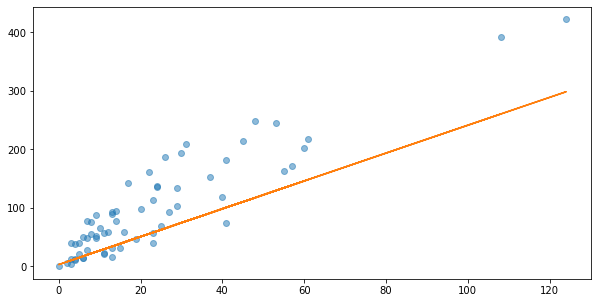

In [21]:
plt.figure(figsize=(10,5)) # fig 인스턴스 생성
plt.plot(raw_X,y, 'o', alpha=0.5) # 원형 마커의 투명도는 0.5인 라인 플롯을 그림( defalult 는 실선)

y_predict = np.dot(X, w)
plt.plot(raw_X,y_predict)

In [22]:
y_predict

array([260.32395638,  48.40668433,  34.12012666, 298.4214435 ,
        98.40963616, 138.88821622,  57.93105611,  36.50121961,
       110.31510088,  26.97684783,  15.07138311, 117.45837972,
        29.35794077,  57.93105611,  19.833569  ,   7.92810427,
        60.31214905,  17.45247605,  10.30919722,  57.93105611,
        17.45247605,  24.59575488,  24.59575488,  10.30919722,
        72.21761377,  19.833569  ,  12.69029016,  50.78777727,
        19.833569  ,  12.69029016,   3.16591838,  62.693242  ,
        17.45247605,  15.07138311,  55.54996316,  29.35794077,
       148.412588  ,  31.73903372,  12.69029016,  41.2634055 ,
        34.12012666, 146.03149505, 100.79072911,  91.26635733,
       134.12603033, 100.79072911,  29.35794077,  67.45542788,
        22.21466194,  10.30919722,  43.64449844,  34.12012666,
        34.12012666,  38.88231255,  22.21466194,  72.21761377,
        74.59870672,  60.31214905,  24.59575488,  76.97979966,
        36.50121961, 129.36384444,  65.07433494])

### Gradient Descent 구현

- $ f(x) = h_\theta(x) $

In [23]:
def hypothesis_function(X, theta):
    return X.dot(theta)

![cost_function](../img/cost_function.png)

In [24]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [25]:
h = hypothesis_function(X, w)  # 1열을 가진 벡터 형태
cost_function(h, y)

1730.989657038738

gredient_descent를 통해 theta를 구한 뒤 hypothesis_function와 cost_function을 이용해 값을 구함

In [26]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [27]:
# Do Linear regression with GD
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.88741985  3.41613537]
cost: 625.3738629516859


In [29]:
theta_list = np.array(theta_list)

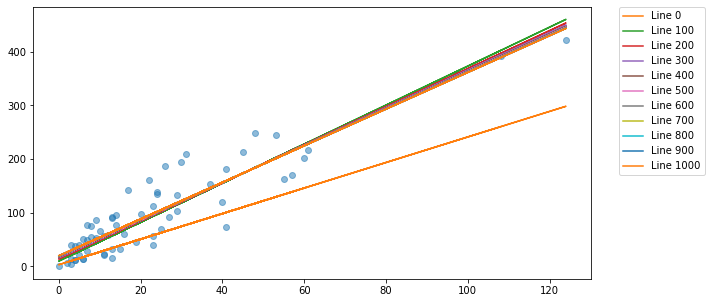

In [30]:
plt.figure(figsize=(10,5))

# EX) X ; 63 by 2, y ; 100 by 2 => y.transpose() ; 2 by 100
# theta : 63개 => 예측값 ; 63번동안 예측한 값
y_predict_step = np.dot(X, theta_list.transpose())

plt.plot(raw_X, y, 'o', alpha = 0.5)

# 100번 마다 나타내기
for i in range(0, len(cost_list), 100):
    plt.plot(raw_X, y_predict_step[:,i], label = 'Line %d' %i)

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

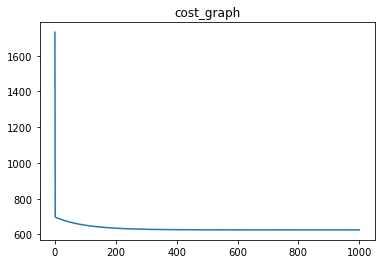

In [32]:
plt.title('cost_graph')
plt.plot(range(len(cost_list)), cost_list)

### Multivariate linear regression models (다항식)

![simult_update](../img/simult_update.png)